Grupo 69 - Datathon 

Gutemberg Almeida - RM 350751



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib import colors
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import GradientBoostingClassifier

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## Limpeza dos Dados

In [3]:
dados = pd.read_csv('G:\My Drive\FIAP\Modulo 05\Datathon\PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

Eliminando Linha Inválida

In [4]:
dados.drop(dados.loc[dados['INDE_CONCEITO_2020']== 'D9891/2'].index, inplace=True)

Eliminiar alunos da FASE 8 
Algoritmo com foco nas Fases 0 a 7

In [5]:
dados['FASE_TURMA_2020'].unique()

array(['2H', nan, '3H', '1D', '2M', '4L', '3B', '0A', '3G', '2D', '1G',
       '3E', '3J', '0C', '2C', '7B', '3C', '2N', '3F', '4F', '1M', '0D',
       '2F', '5X', '6C', '6B', '5F', '1N', '2L', '1F', '3L', '0B', '1A',
       '4B', '6A', '0G', '3M', '3A', '7A', '1J', '0F', '0H', '4A', '1C',
       '5A', '5L', '1R', '2J', '1H', '8A', '1B', '0E', '5G', '2G', '2R',
       '5B', '2P', '1E', '2B', '2E', '3R', '1K', '4E'], dtype=object)

In [6]:
dados.drop(dados.loc[dados['FASE_TURMA_2020']== '8A'].index, inplace=True)

In [7]:
dados['FASE_2021'].unique()

array([ 2., nan,  3.,  5.,  1.,  0.,  4.,  7.,  6.])

In [8]:
dados['FASE_2022'].unique()

array([nan,  0.,  2.,  1.,  5.,  4.,  3.,  7.,  6.])

In [9]:
dados.replace(to_replace="Não",value=0,inplace=True)
dados.replace(to_replace="Sim",value=1, inplace=True)
dados.replace(to_replace='#NULO!',value= np.nan ,inplace=True)

Separando os Alunos que cursaram 2020 e foram avaliados em relação ao PONTO de VIRADA

In [10]:
alunos_2020 = dados[['NOME','PONTO_VIRADA_2020', 'INDE_2020', 'IAN_2020', 'IDA_2020', 'IEG_2020', 'IAA_2020', 'IPS_2020', 'IPP_2020', 'IPV_2020' ]] 
alunos_2020 = alunos_2020.dropna(subset=['PONTO_VIRADA_2020'])
alunos_2020['Ano'] = 2020
alunos_2020.rename(columns={'PONTO_VIRADA_2020': 'PONTO_VIRADA'}, inplace = True)
alunos_2020.rename(columns={'INDE_2020': 'INDE'}, inplace = True)
alunos_2020.rename(columns={'IAN_2020': 'IAN'}, inplace = True)
alunos_2020.rename(columns={'IDA_2020': 'IDA'}, inplace = True)
alunos_2020.rename(columns={'IEG_2020': 'IEG'}, inplace = True)
alunos_2020.rename(columns={'IAA_2020': 'IAA'}, inplace = True)
alunos_2020.rename(columns={'IPS_2020': 'IPS'}, inplace = True)
alunos_2020.rename(columns={'IPP_2020': 'IPP'}, inplace = True)
alunos_2020.rename(columns={'IPV_2020': 'IPV'}, inplace = True)
alunos_2020[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']] = alunos_2020[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']].astype('float64')

Separando os Alunos que cursaram 2021 e foram avaliados em relação ao PONTO de VIRADA

In [11]:
alunos_2021 = dados[['NOME','PONTO_VIRADA_2021', 'INDE_2021', 'IAN_2021', 'IDA_2021', 'IEG_2021', 'IAA_2021', 'IPS_2021', 'IPP_2021', 'IPV_2021' ]] 
alunos_2021 = alunos_2021.dropna(subset=['PONTO_VIRADA_2021'])
alunos_2021['Ano'] = 2021
alunos_2021.rename(columns={'PONTO_VIRADA_2021': 'PONTO_VIRADA'}, inplace = True)
alunos_2021.rename(columns={'INDE_2021': 'INDE'}, inplace = True)
alunos_2021.rename(columns={'IAN_2021': 'IAN'}, inplace = True)
alunos_2021.rename(columns={'IDA_2021': 'IDA'}, inplace = True)
alunos_2021.rename(columns={'IEG_2021': 'IEG'}, inplace = True)
alunos_2021.rename(columns={'IAA_2021': 'IAA'}, inplace = True)
alunos_2021.rename(columns={'IPS_2021': 'IPS'}, inplace = True)
alunos_2021.rename(columns={'IPP_2021': 'IPP'}, inplace = True)
alunos_2021.rename(columns={'IPV_2021': 'IPV'}, inplace = True)
alunos_2021[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']] = alunos_2021[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']].astype('float64')

Separando os Alunos que cursaram  2022  e foram avaliados em relação ao PONTO de VIRADA

In [12]:
alunos_2022 = dados[['NOME','PONTO_VIRADA_2022', 'INDE_2022', 'IAN_2022', 'IDA_2022', 'IEG_2022', 'IAA_2022', 'IPS_2022', 'IPP_2022', 'IPV_2022' ]] 
alunos_2022 = alunos_2022.dropna(subset=['INDE_2022'])
alunos_2022['Ano'] = 2022
alunos_2022.rename(columns={'PONTO_VIRADA_2022': 'PONTO_VIRADA'}, inplace = True)
alunos_2022.rename(columns={'INDE_2022': 'INDE'}, inplace = True)
alunos_2022.rename(columns={'IAN_2022': 'IAN'}, inplace = True)
alunos_2022.rename(columns={'IDA_2022': 'IDA'}, inplace = True)
alunos_2022.rename(columns={'IEG_2022': 'IEG'}, inplace = True)
alunos_2022.rename(columns={'IAA_2022': 'IAA'}, inplace = True)
alunos_2022.rename(columns={'IPS_2022': 'IPS'}, inplace = True)
alunos_2022.rename(columns={'IPP_2022': 'IPP'}, inplace = True)
alunos_2022.rename(columns={'IPV_2022': 'IPV'}, inplace = True)
alunos_2022[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']] = alunos_2022[['INDE','IAN','IDA', 'IEG', 'IAA','IPS','IPP','IPV']].astype('float64')

Concatenando os Alunos com Avaliação do Ponto de Virada

In [13]:
alunos = pd.concat([alunos_2020, alunos_2021, alunos_2022], axis=0)

In [14]:
alunos.shape

(2247, 11)

In [15]:
alunos.head()

,NOME,PONTO_VIRADA,INDE,IAN,IDA,IEG,IAA,IPS,IPP,IPV,Ano
0,ALUNO-1,0.0,7.883752,10.0,7.000000,8.7,8.50002,7.500,5.9375,7.750000,2020
2,ALUNO-3,0.0,7.856390,10.0,5.500000,8.9,7.91667,7.500,8.1250,8.111113,2020
3,ALUNO-4,0.0,5.076252,5.0,0.000000,4.1,8.00002,6.875,7.1875,7.750000,2020
4,ALUNO-5,0.0,8.077085,10.0,7.500000,8.0,7.50002,7.500,8.4375,8.166665,2020
7,ALUNO-8,1.0,8.381391,10.0,7.333333,9.9,8.33334,4.375,8.7500,8.944450,2020


## Análise dos Dados


Visualizando as quantidades de Avaliações e de Alunos que fizeram a Virada excluindo os alunos 8 Ano

In [16]:
alunos_ano = alunos.groupby('Ano')['NOME'].count() 
aluno_ano = pd.DataFrame(alunos_ano)
aluno_ano.rename({'NOME': 'Qtd_Aluno'}, axis='columns', inplace = True)


In [17]:
aluno_ano

,Qtd_Aluno
Ano,
2020,701
2021,684
2022,862


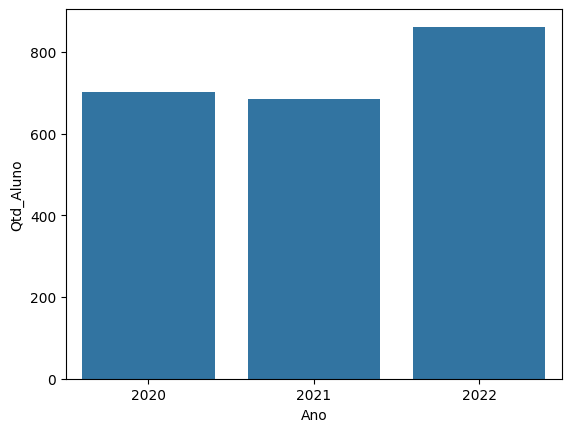

In [18]:
g = sns.barplot(x='Ano', y='Qtd_Aluno', data=aluno_ano)


In [19]:
alunos_ano_virada = alunos.groupby(by=['Ano','PONTO_VIRADA'])['Ano'].count()

In [20]:
df_aluno_virada = pd.DataFrame({'index':alunos_ano_virada.index, 'valor':alunos_ano_virada.values})

In [21]:
df_aluno_virada["Ano"], df_aluno_virada["Virada"] =  zip(*df_aluno_virada["index"])

In [22]:
df_aluno_virada.head()

,index,valor,Ano,Virada
0,"(2020, 0.0)",607,2020,0.0
1,"(2020, 1.0)",94,2020,1.0
2,"(2021, 0.0)",576,2021,0.0
3,"(2021, 1.0)",108,2021,1.0
4,"(2022, 0.0)",749,2022,0.0


In [23]:
df_aluno_virada['Virada'].replace(to_replace=0,value="Não",inplace=True)
df_aluno_virada['Virada'].replace(to_replace=1,value="Sim",inplace= True)

In [24]:
df_aluno_virada.drop('index', axis='columns', inplace=True)

In [25]:
# create data 
labels = df_aluno_virada['Ano'].unique().tolist()

y1 = df_aluno_virada.query( 'Virada == "Sim"')['valor'].to_list()
y2 = df_aluno_virada.query( 'Virada == "Não"')['valor'].to_list()

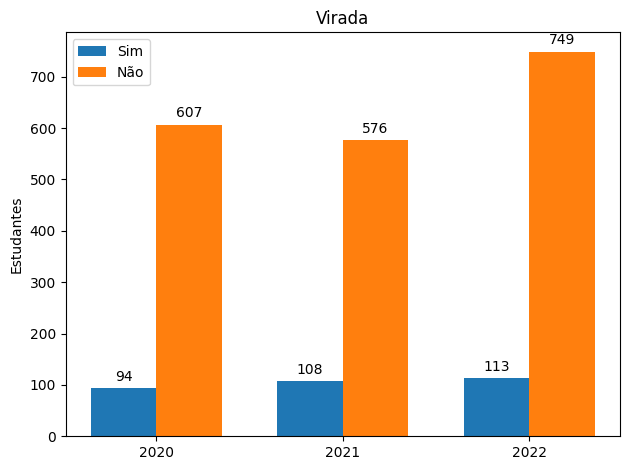

In [26]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y1, width, label='Sim')
rects2 = ax.bar(x + width/2, y2, width, label='Não')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Estudantes')
ax.set_title('Virada')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Comparando os indicadores dos alunos que viraram a Chave com os alunos que ainda estão em progresso

In [27]:
df_virada = alunos.query( 'PONTO_VIRADA == 1')

In [28]:
df_virada.shape

(315, 11)

In [29]:
df_progresso = alunos.query( 'PONTO_VIRADA == 0')

In [30]:
df_progresso.shape

(1932, 11)

In [31]:
df_virada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 7 to 1345
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NOME          315 non-null    object 
 1   PONTO_VIRADA  315 non-null    float64
 2   INDE          315 non-null    float64
 3   IAN           315 non-null    float64
 4   IDA           315 non-null    float64
 5   IEG           315 non-null    float64
 6   IAA           315 non-null    float64
 7   IPS           315 non-null    float64
 8   IPP           315 non-null    float64
 9   IPV           315 non-null    float64
 10  Ano           315 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 29.5+ KB


In [32]:
data_virada = df_virada[['INDE', 'IAN', 'IDA', 'IEG','IAA', 'IPS', 'IPP', 'IPV']]
data_progresso = df_progresso[['INDE', 'IAN', 'IDA', 'IEG','IAA', 'IPS', 'IPP', 'IPV']]

<Axes: >

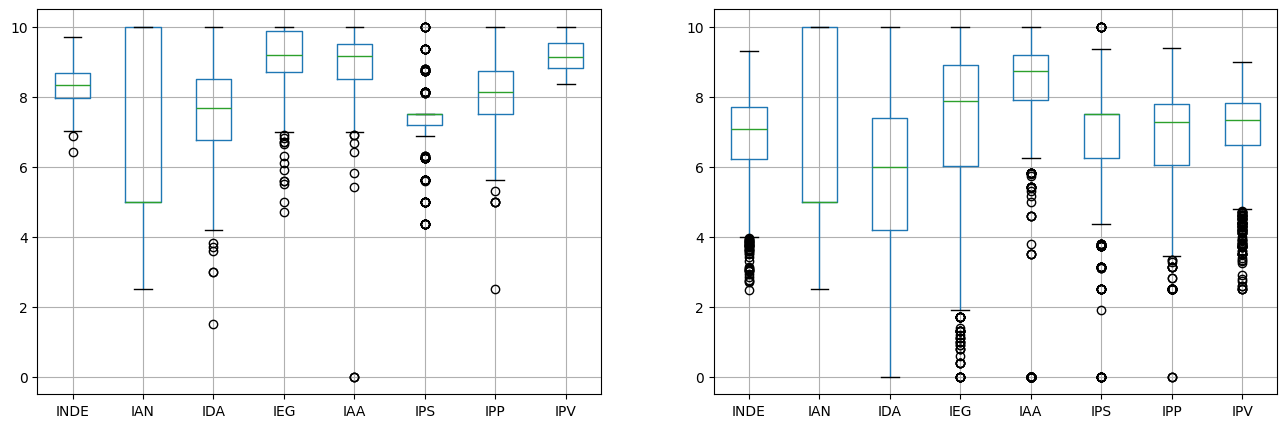

In [33]:
plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
data_virada.boxplot()
plt.subplot(122)
data_progresso.boxplot()

<Axes: >

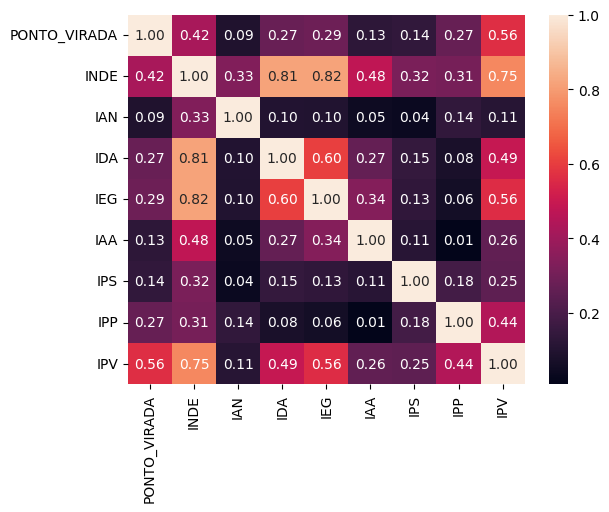

In [34]:
sns.heatmap(alunos[['PONTO_VIRADA', 'INDE','IAN','IDA','IEG','IAA', 'IPS', 'IPP', 'IPV']].corr(), annot=True, fmt='.2f')

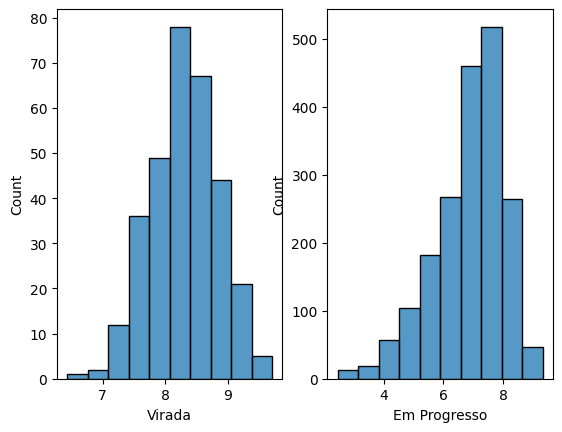

In [35]:

plt.subplot(121)
sns.histplot(data=df_virada, x='INDE', bins=10) 
plt.xlabel("Virada")
plt.subplot(122)
sns.histplot(data=df_progresso, x='INDE', bins=10) 
plt.xlabel("Em Progresso")
plt.show()

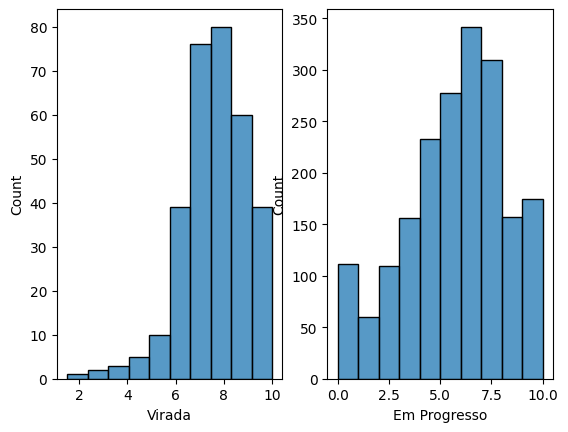

In [36]:
plt.subplot(121)
sns.histplot(data=df_virada, x='IDA', bins=10) 
plt.xlabel("Virada")
plt.subplot(122)
sns.histplot(data=df_progresso, x='IDA', bins=10) 
plt.xlabel("Em Progresso")
plt.show()

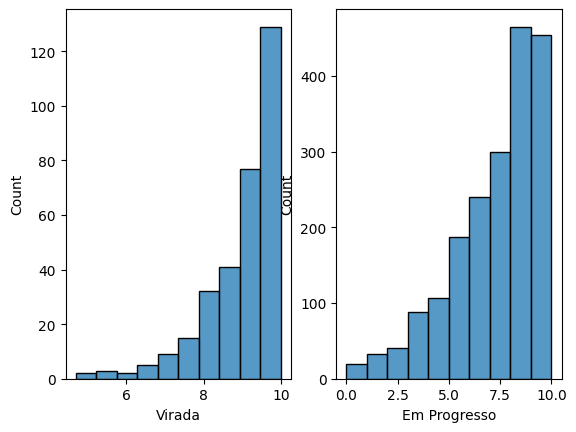

In [37]:
plt.subplot(121)
sns.histplot(data=df_virada, x='IEG', bins=10) 
plt.xlabel("Virada")
plt.subplot(122)
sns.histplot(data=df_progresso, x='IEG', bins=10) 
plt.xlabel("Em Progresso")
plt.show()

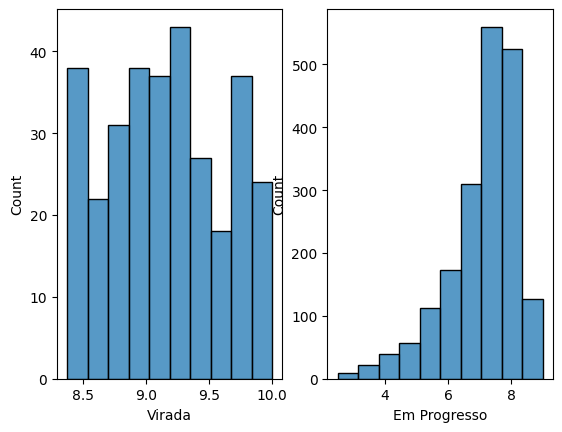

In [38]:
plt.subplot(121)
sns.histplot(data=df_virada, x='IPV', bins=10) 
plt.xlabel("Virada")
plt.subplot(122)
sns.histplot(data=df_progresso, x='IPV', bins=10) 
plt.xlabel("Em Progresso")
plt.show()

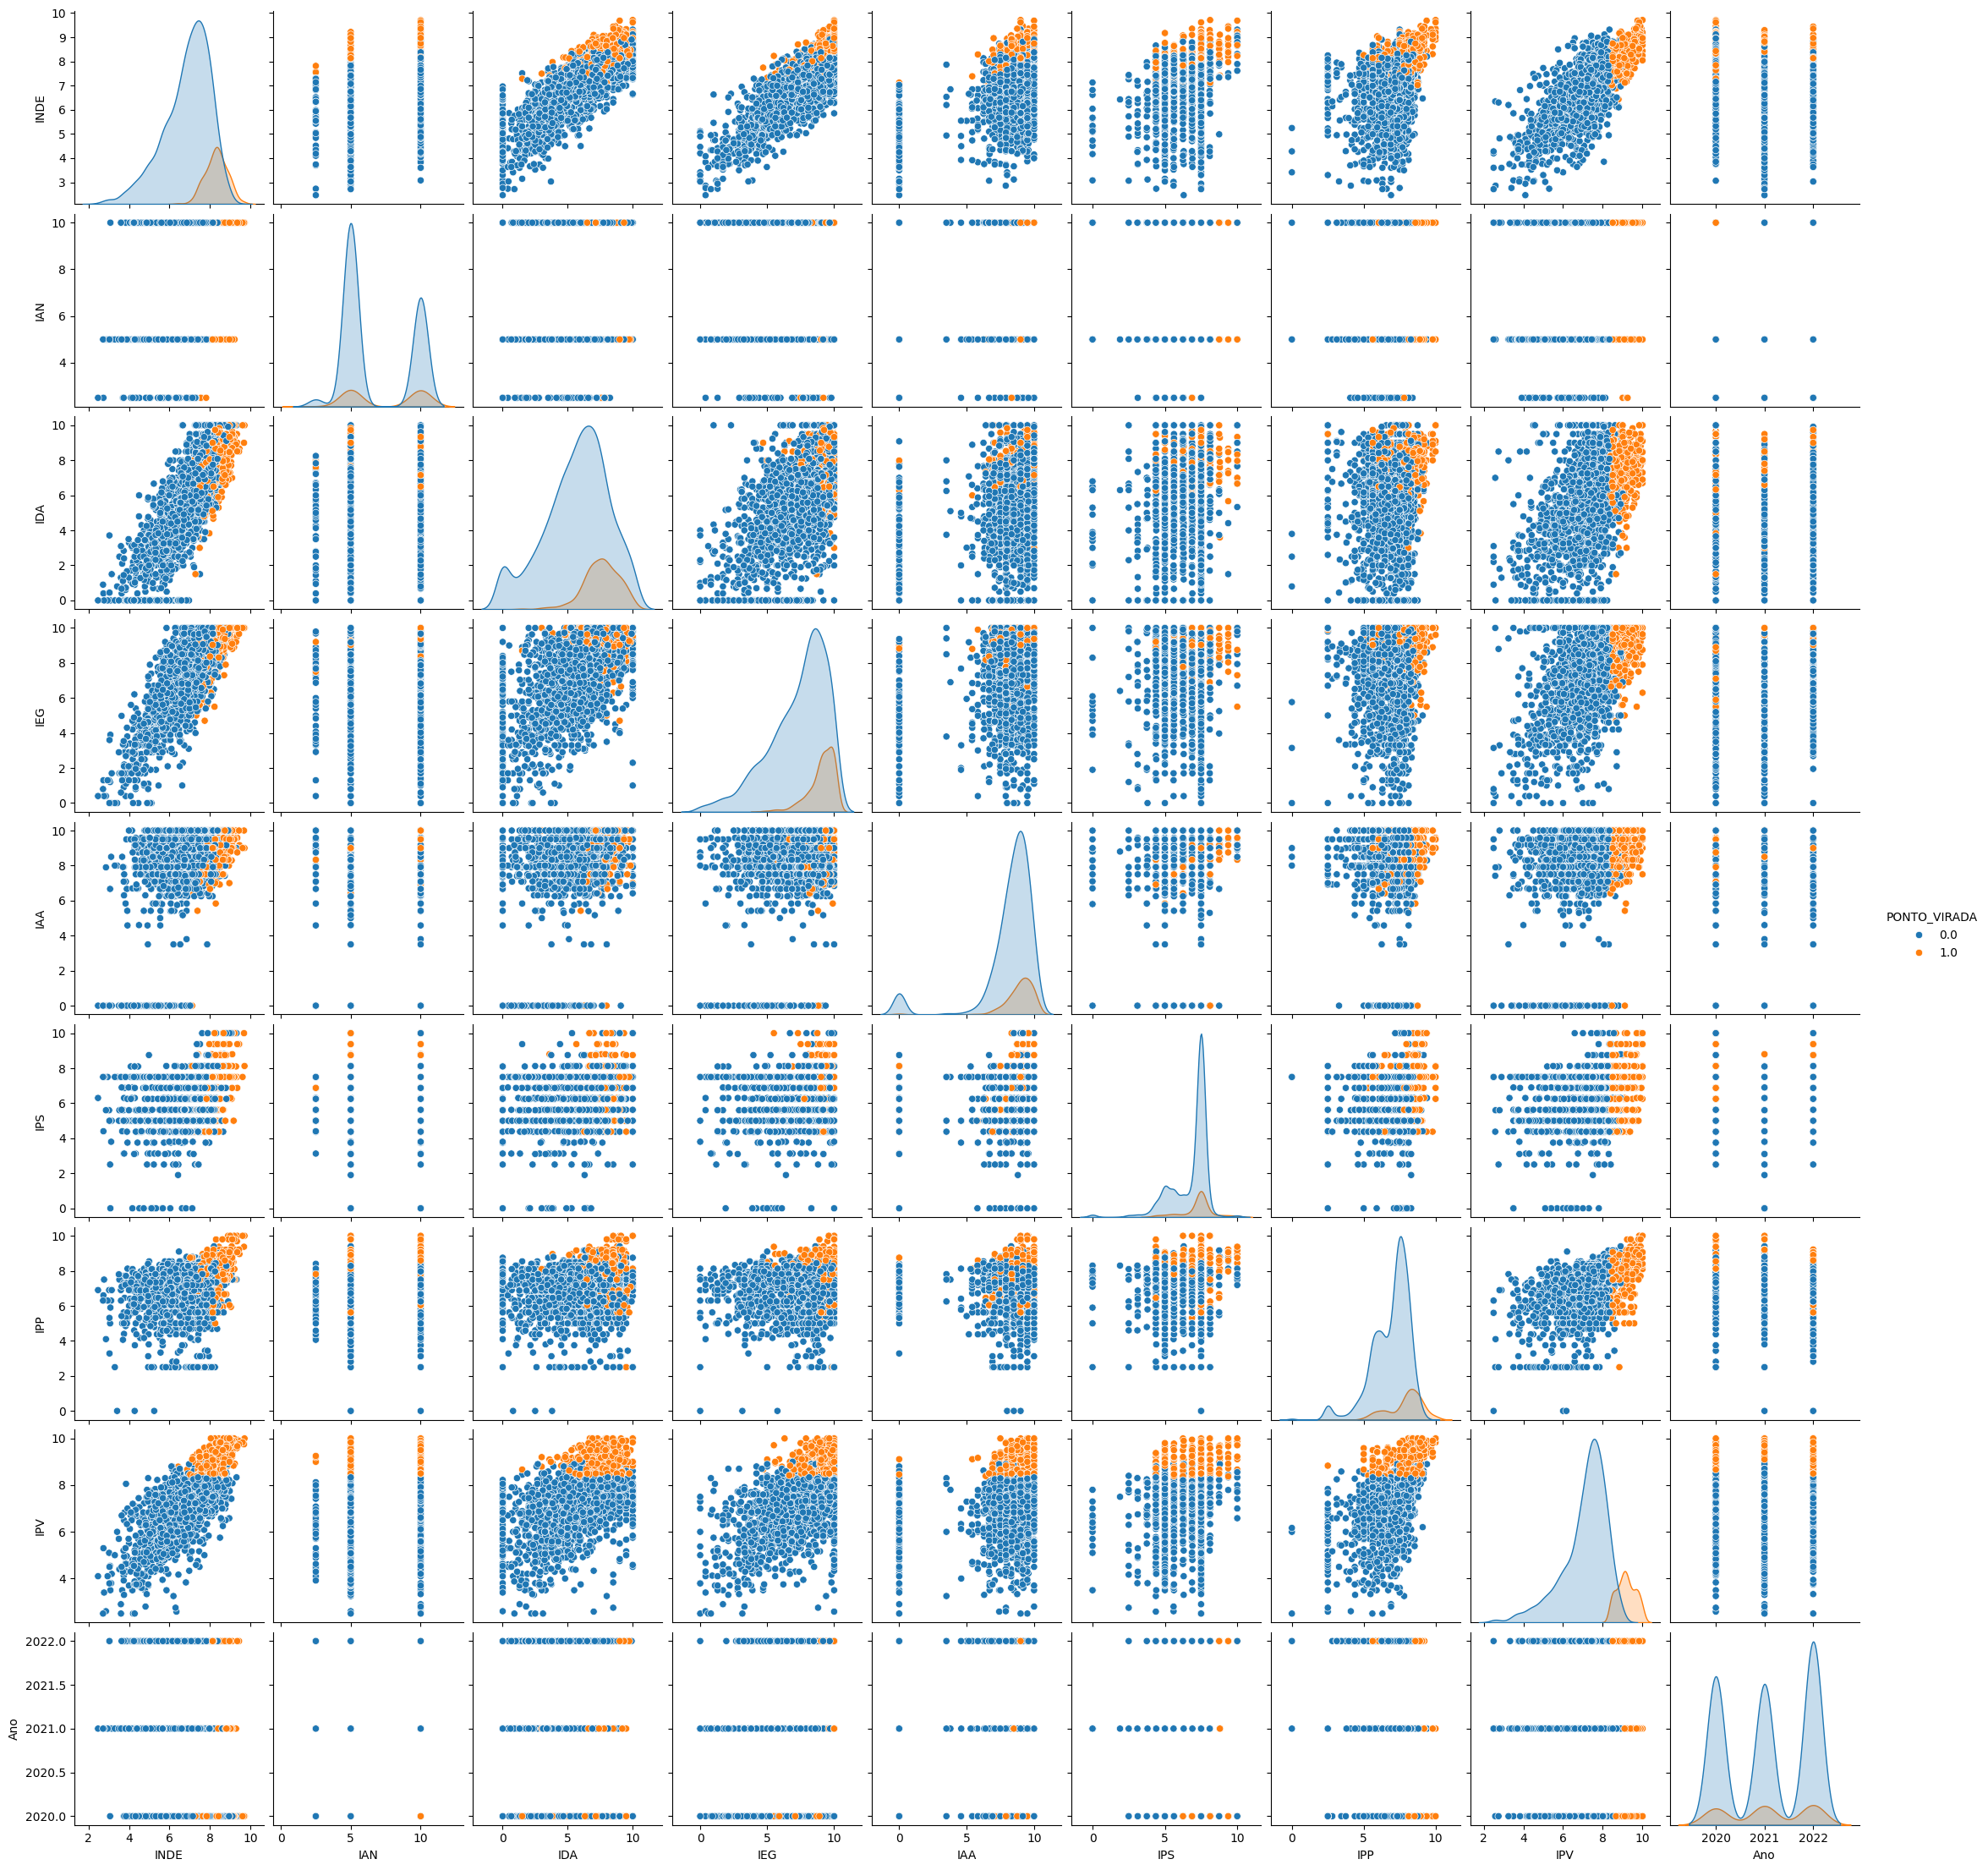

In [39]:
sns.pairplot(alunos, hue="PONTO_VIRADA")
plt.show()

## Criação do modelo de Machine Learming

Retirando a coluna INDE que tem uma correlação muito forte

In [40]:
# x = alunos[['INDE','IAN','IDA','IEG','IAA', 'IPS', 'IPP', 'IPV']]
x = alunos[[ 'IAN','IDA','IEG','IAA', 'IPS', 'IPP', 'IPV']]
y = alunos['PONTO_VIRADA']  #target

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino

In [42]:
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [43]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

In [44]:
x_train

,IAN,IDA,IEG,IAA,IPS,IPP,IPV
202,10.0,5.500000,9.000000,9.50002,6.875,6.250000,5.833337
75,10.0,10.000000,10.000000,8.91668,10.000,7.500000,6.583330
1070,5.0,3.583333,5.417989,9.50002,5.625,6.041667,6.666663
389,10.0,7.666667,5.300000,8.33334,7.500,7.708333,7.388890
114,5.0,5.166667,1.900000,9.16668,6.875,7.916667,5.111107
...,...,...,...,...,...,...,...
228,5.0,8.000000,5.108974,8.00002,5.000,4.375000,5.833330
963,10.0,5.777778,8.203283,8.33334,7.500,7.656250,7.874998
365,5.0,3.055556,6.851190,5.41666,6.250,7.343750,5.874993
556,5.0,7.500000,8.500000,9.50002,6.250,8.437500,7.916665


In [45]:
x_train_escalonado

array([[1.        , 0.55      , 0.9       , ..., 0.6875    , 0.625     ,
        0.4444443 ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.75      ,
        0.54444327],
       [0.33333333, 0.35833333, 0.54179894, ..., 0.5625    , 0.60416667,
        0.55555437],
       ...,
       [0.33333333, 0.30555556, 0.68511905, ..., 0.625     , 0.734375  ,
        0.4499984 ],
       [0.33333333, 0.75      , 0.85      , ..., 0.625     , 0.84375   ,
        0.72222104],
       [0.33333333, 0.575     , 0.83201058, ..., 0.5       , 0.5625    ,
        0.59259121]])

In [46]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

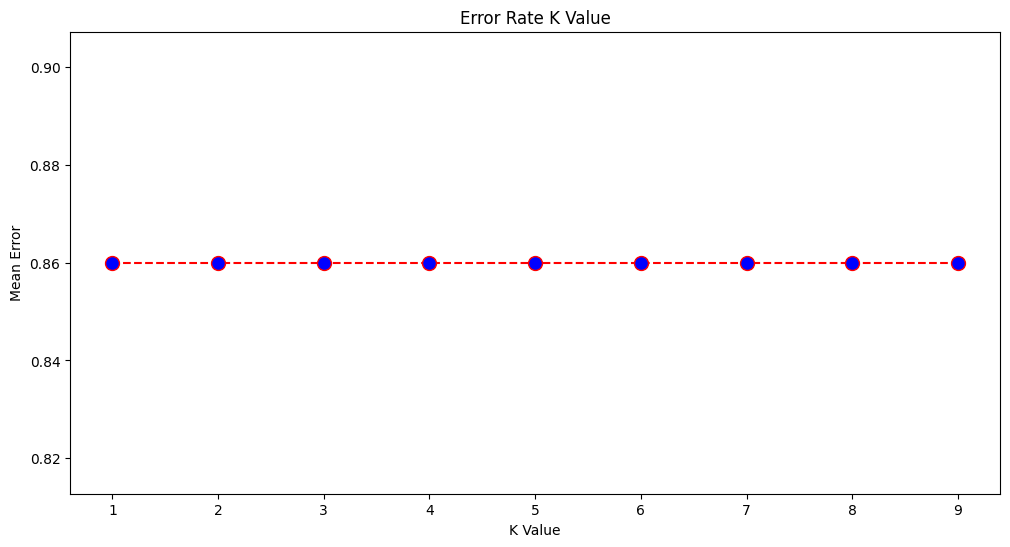

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [48]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=10)

In [49]:
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier(n_neighbors=10)

In [50]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

In [51]:
print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

Training set score: 0.1413
Test set score: 0.1400


In [52]:
# Acurácia do modelo
print(accuracy_score(y_test, y_predito))

0.9488888888888889


## Random Forrest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

In [55]:
rf = RandomForestClassifier( random_state=7)

In [56]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=7)

In [57]:
y_pred_rf = rf.predict(x_test)

In [58]:
accuracy_equilibrado_rf = accuracy_score(y_test , y_pred_rf)
print("Accuracy Equilibrado RF",round(accuracy_equilibrado_rf,2) )

Accuracy Equilibrado RF 0.98


Modelo com Overfit 

Retirando os outliers dos alunos que ainda não fizeram a Virada

In [59]:
len_progresso_full = len(df_progresso)
print("Total de Registros sem virada ", len_progresso_full)

Total de Registros sem virada  1932


In [60]:
def remove_outliers(df, nome_coluna):
  
    coluna = df[nome_coluna]
    len_progresso_full = len(df)
    print("Total de Registros sem virada ", len_progresso_full)

    coluna_med = coluna.mean()
    coluna_std = coluna.std()

    limite_sup = coluna_med + (2 * coluna_std)
    limite_inf = coluna_med - (2 * coluna_std)

    index_outliers = []

    for index, valor in coluna.items(): 
        if valor > limite_sup or valor < limite_inf:
            index_outliers.append(index)

    len(index_outliers)
    df.drop(index_outliers, inplace = True)

    print ("Coluna ", nome_coluna)
    print("Total de outliers eliminado ", len(index_outliers))

In [61]:
# remove_outliers(df_progresso,'INDE')
remove_outliers(df_progresso,'IEG')
remove_outliers(df_progresso,'IAA')
remove_outliers(df_progresso,'IPS')
remove_outliers(df_progresso,'INDE')
remove_outliers(df_progresso,'IEG')
remove_outliers(df_progresso,'IPP')
remove_outliers(df_progresso,'IPV')

Total de Registros sem virada  1932
Coluna  IEG
Total de outliers eliminado  93
Total de Registros sem virada  1752
Coluna  IAA
Total de outliers eliminado  73
Total de Registros sem virada  1617
Coluna  IPS
Total de outliers eliminado  53
Total de Registros sem virada  1520
Coluna  INDE
Total de outliers eliminado  64
Total de Registros sem virada  1416
Coluna  IEG
Total de outliers eliminado  68
Total de Registros sem virada  1296
Coluna  IPP
Total de outliers eliminado  45
Total de Registros sem virada  1218
Coluna  IPV
Total de outliers eliminado  62


In [62]:
df_progresso.shape

(1107, 11)

In [63]:
df_virada.shape

(315, 11)

Pegando uma Amostra Menor dos alunos que ainda não fizeram a virada para treinamento do modelo

In [64]:
from sklearn.utils import shuffle

df_progresso = shuffle(df_progresso)

In [65]:
df_progresso_amostra = df_progresso[:len(df_virada)]

In [66]:
df_progresso_amostra.shape

(315, 11)

In [67]:
df_aluno_amostra = pd.concat([df_virada, df_progresso_amostra], axis=0 )

In [68]:
df_aluno_amostra.shape

(630, 11)

## Criando um modelo de Rede Neural para Classificação

In [69]:
# x = df_aluno_amostra[['INDE','IAN','IDA','IEG','IAA', 'IPS', 'IPP', 'IPV']]
x = df_aluno_amostra[['IAN','IDA','IEG','IAA', 'IPS', 'IPP', 'IPV']]
y = df_aluno_amostra['PONTO_VIRADA']  #target

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% para teste e 80% de treino


In [71]:
#scaler = MinMaxScaler() 
#scaler.fit(x_train)

In [72]:
# Na hora de transformar, devemos transformar ambos os conjuntos
#x_train_escalonado = scaler.transform(x_train)#treino
#x_test_escalonado = scaler.transform(x_test)#teste

In [73]:
SEED = 1561651

def roda_modelo(modelo):


    # Treinando modelo com os dados de treino

    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    #métrica KS: probabilidade de um cliente ser classificado como bom ou mau. 
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"Métrica KS: {kstest}")

    print("\nConfusion Matrix\n")
    matriz_confusao = ConfusionMatrixDisplay.from_estimator(modelo, 
                                                            x_test, 
                                                            y_test, 
                                                            normalize='true',
                                                            display_labels=['Virada', 'Progresso'],
                                                            cmap=plt.cm.Blues)
        
    matriz_confusao.ax_.set_title("Matriz de Confusão\n Normalizada", fontsize=16, fontweight="bold")

    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))


    print("\nRoc Curve\n")
    RocCurveDisplay.from_estimator(modelo, x_test, y_test)

## Modelo de Classificação GradientBoosting

In [74]:
modelo_xgb = GradientBoostingClassifier()


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9924414210128496
Métrica KS: KstestResult(statistic=0.21428571428571427, pvalue=0.0060105437577116306, statistic_location=0.9986574179617898, statistic_sign=1)

Confusion Matrix



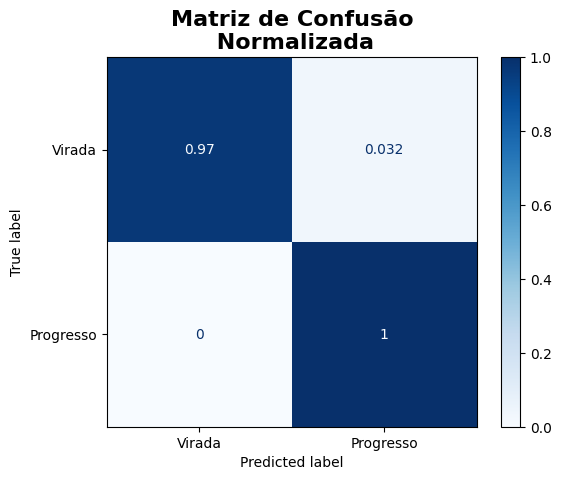


Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        63
         1.0       0.97      1.00      0.98        63

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126


Roc Curve



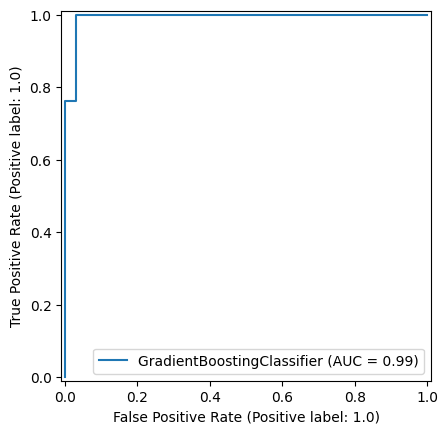

In [75]:
roda_modelo(modelo_xgb)

# Modelo de Regressão Logística

In [76]:
modelo_logistico = LogisticRegression()


------------------------------Resultados LogisticRegression()------------------------------

AUC 0.9783320735701688
Métrica KS: KstestResult(statistic=0.09523809523809523, pvalue=0.6191811033113183, statistic_location=0.49926518002231235, statistic_sign=-1)

Confusion Matrix



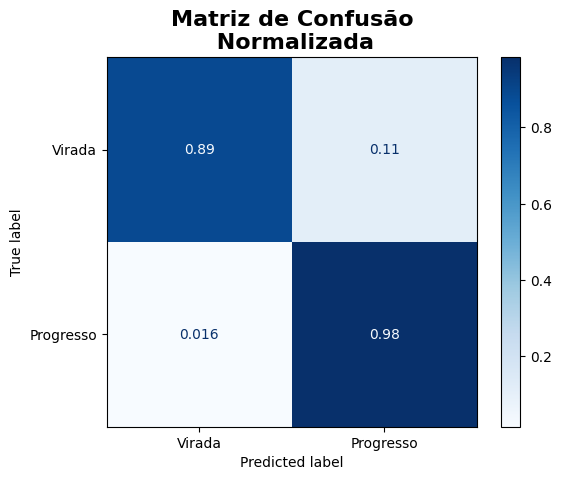


Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93        63
         1.0       0.90      0.98      0.94        63

    accuracy                           0.94       126
   macro avg       0.94      0.94      0.94       126
weighted avg       0.94      0.94      0.94       126


Roc Curve



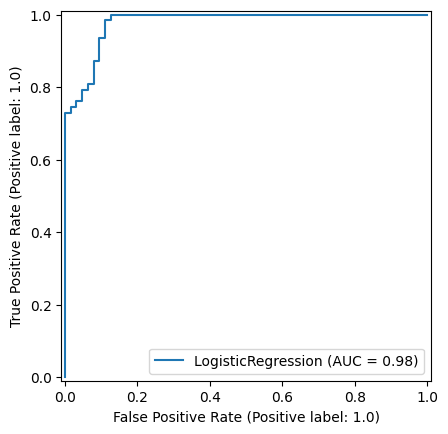

In [77]:
roda_modelo(modelo_logistico)

## Modelo KNeighborsClassifier 

In [78]:
modelo_knn = KNeighborsClassifier()


------------------------------Resultados KNeighborsClassifier()------------------------------

AUC 0.9531368102796675
Métrica KS: KstestResult(statistic=0.06349206349206349, pvalue=0.9625230897278968, statistic_location=0.4, statistic_sign=1)

Confusion Matrix



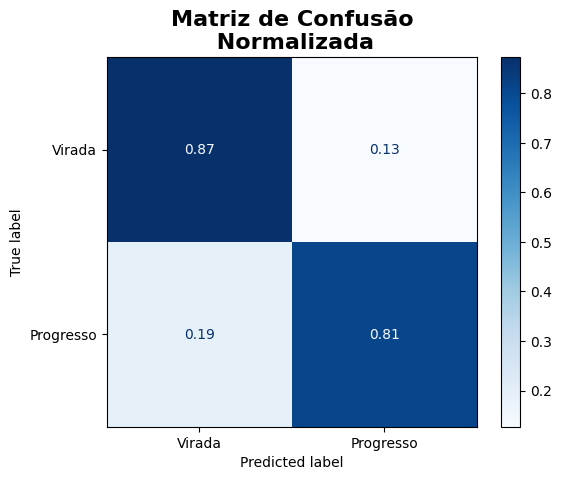


Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85        63
         1.0       0.86      0.81      0.84        63

    accuracy                           0.84       126
   macro avg       0.84      0.84      0.84       126
weighted avg       0.84      0.84      0.84       126


Roc Curve



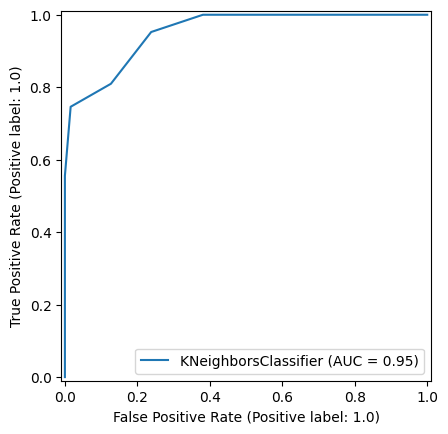

In [79]:
roda_modelo(modelo_knn)

Melhor modelo foi o de Classificação GradientBoosting

In [80]:
import joblib 

In [81]:
joblib.dump(modelo_xgb, 'xgb.joblib')

['xgb.joblib']

Modelo Exportado para ser usado no aplicação do Streamlit